## Identify and match activity points to a segment

In [46]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [55]:
import warnings
import pandas as pd
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

import sys
sys.path.append("../gpsfun")

from readers import gpsbabel

activity_file = "..//tests/test_data/Mt_Evans_Hill_Climb_v1.fit"

df = gpsbabel(activity_file)

# activity = df[['Latitude', 'Longitude', 'Altitude']]
activity = df

segments = [{'Segment_name':'Event Start',
            'segment_number': 0,
            'location': (39.737912, -105.523881),
            'type_name': 'transport',
            'type_ags': {'time_limit': 1800}
            },
          {'Segment_name':'Chicago climb',
           'segment_number': 1,
            'location': (39.693782, -105.617329),
            'type_name': 'timed',
            'type_args': {'timed': None}
            },
           {'Segment_name':'Lets get up high',
            'segment_number': 2,
            'location': (39.660844, -105.604562),
            'type_name': 'transport',
            'type_ags': {'time_limit': 1800}
           },
           {'Segment_name':'Sprint to the top',
            'segment_number': 3,
            'location': (39.597276, -105.640821),
            'type_name': 'timed',
            'type_args': {'timed': None},
           },
             {'Segment_name':'Finish',
            'segment_number': 4,
            'location': (39.587480, -105.643684),
            'type': {'end':None}
             }
           ]

#### Take a quick look at the activity and segment points
* This code is not used just to help get a look at what we got.

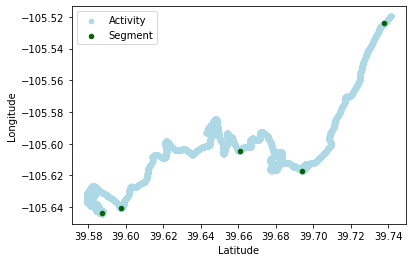

In [56]:
seg_points = pd.DataFrame([p['location'] for p in segments], columns=['Latitude', 'Longitude'])
act_pl = activity.plot.scatter(x='Latitude', y='Longitude', color='LightBlue', label='Activity')
seg_points.plot.scatter(x='Latitude', y='Longitude', color='DarkGreen', label='Segment', ax=act_pl)

* Lets identify the points close to the segment point.
*  require that they are bwtween the activity points closest. This is done by chaching is the triangle is acute

In [57]:
from rallystyle import RallyResults

r = RallyResults(df=activity, segments=segments)
r.init_columns
r.match_checkpoints()
r.calc_results()
# print(r.df[['to_next', 'acute', 'mark', 'checkpoint', 'segment', 'seg_time']][r.df.checkpoint >= 0])

[{'Segment_name': 'Event Start',
  'segment_number': 0,
  'location': (39.737912, -105.523881),
  'type_name': 'transport',
  'type_ags': {'time_limit': 1800},
  'duration': Timedelta('0 days 00:24:21'),
  'date_time': Timestamp('2012-07-21 09:18:13'),
  'total_timed': datetime.timedelta(0)},
 {'Segment_name': 'Chicago climb',
  'segment_number': 1,
  'location': (39.693782, -105.617329),
  'type_name': 'timed',
  'type_args': {'timed': None},
  'duration': Timedelta('0 days 00:31:40'),
  'date_time': Timestamp('2012-07-21 09:42:34'),
  'total_timed': Timedelta('0 days 00:31:40')},
 {'Segment_name': 'Lets get up high',
  'segment_number': 2,
  'location': (39.660844, -105.604562),
  'type_name': 'transport',
  'type_ags': {'time_limit': 1800},
  'duration': Timedelta('0 days 00:53:47'),
  'date_time': Timestamp('2012-07-21 10:14:14'),
  'total_timed': Timedelta('0 days 00:31:40')},
 {'Segment_name': 'Sprint to the top',
  'segment_number': 3,
  'location': (39.597276, -105.640821),
  '

In [58]:
r.df[:4]

,Date_Time,No,Latitude,Longitude,Altitude,Temperature,Speed,Heartrate,shift_Longitude,shift_Latitude,...,seg_duration,ck_to_A1,ck_to_B1,ck_to_A2,ck_to_B2,ck_to_A3,ck_to_B3,ck_to_A4,ck_to_B4,segment
0,2012-07-21 09:15:20,1,39.738603,-105.523477,2176.4,NaN,0.0,103.0,-105.523472,39.738602,...,NaT,0.104005,0.104009,0.112344,0.112347,0.183693,0.183695,0.193101,0.193103,NaN
1,2012-07-21 09:15:21,2,39.738602,-105.523472,2176.4,NaN,0.0,103.0,-105.523468,39.738600,...,NaT,0.104009,0.104012,0.112347,0.112349,0.183695,0.183696,0.193103,0.193104,NaN
2,2012-07-21 09:15:23,3,39.738600,-105.523468,2176.4,21.0,0.0,101.0,-105.523468,39.738600,...,NaT,0.104012,0.104012,0.112349,0.112349,0.183696,0.183696,0.193104,0.193104,NaN
3,2012-07-21 09:15:24,4,39.738600,-105.523468,2180.0,21.0,0.0,99.0,-105.523468,39.738598,...,NaT,0.104012,0.104011,0.112349,0.112347,0.183696,0.183694,0.193104,0.193102,NaN


In [84]:
from ipyleaflet import  Map, AntPath, basemaps, LocalTileLayer, Marker, MarkerCluster, Polyline

c = r.df[['Latitude','Longitude']].mean().to_list()
m = Map(center=c, zoom=14)
m.layout.width = '100%'
m.layout.height = '2000px'
m.add_layer(LocalTileLayer(path="https://tiles.wmflabs.org/hikebike/{z}/{x}/{y}.png"))

line_activity = Polyline(
    locations=r.df[['Latitude','Longitude']].values.tolist(),
    stroke = True,
    color = "green",
    fill = False
    )
m.add_layer(line_activity)

# line_segment = Polyline(
#     locations=r.df[['Latitude','Longitude']][r.df.checkpoint>=0].values.tolist(),
#     stroke = True,
#     color = "Black",
#     fill = False
#     )
# m.add_layer(line_segment)

ma = []
# for p in activity[['Latitude','Longitude']][r.df.checkpoint>=0].values.tolist():
#     ma.append(Marker(location=p, title='Match'))

mp = []
for s in seg_points.values.tolist():
    mp.append(Marker(location=s, title='Segment'))

mc = ma + mp
mapc = MarkerCluster(markers=mc)
m.add_layer(mapc)

m
m.save('my_map.html', title='My Map')